In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas import read_csv

In [ ]:
def convert(image_idx, label_idx, output_csv, row):
    with open(image_idx, "rb") as input_image, open(label_idx, "rb") as input_label, open(output_csv, "w") as output:
        input_image.read(16)
        input_label.read(8)
        image_arr = []
        for i in range(row):
            image = [ord(input_label.read(1))]
            for j in range(28 * 28):
                image.append(ord(input_image.read(1)))
            image_arr.append(image)
        header_arr = ["label"]
        for i in range(28 * 28):
            header_arr.append(f"p{i}")
        output.write(",".join(header_arr) + "\n")
        for image in image_arr:
            output.write(",".join(str(pix) for pix in image) + "\n")

convert("./data/idx/train-images.idx3-ubyte", "./data/idx/train-labels.idx1-ubyte", "./data/csv/train.csv", 60000)
convert("./data/idx/t10k-images.idx3-ubyte", "./data/idx/t10k-labels.idx1-ubyte", "./data/csv/test.csv", 10000)

In [11]:
csv = pd.read_csv('./data/csv/train.csv')
train_image = csv.iloc[0:10000, 1:] # Form an array from row 0 to row 9999 rows, from column 1 to column 784
test_image = csv.iloc[10000:20000, 1:]
train_label = csv.iloc[0:10000, :1] # Form an array from row 0 to row 9999 rows, with column 0
test_label = csv.iloc[10000:20000, :1]

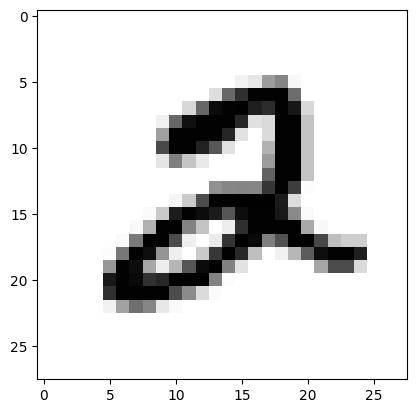

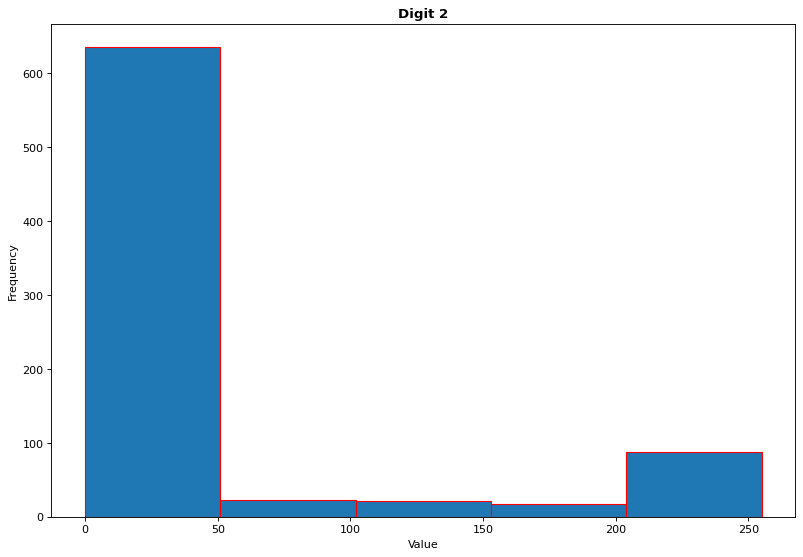

In [14]:
idx = 5
digit_image = train_image.iloc[idx].to_numpy() # .iloc[idx]: Pick out the idx-th row | to.numpy: transfer into an array
digit_image = digit_image.reshape((28, 28)) # Reshape into a 28x28 2d array
# Plot a digit image
plt.imshow(digit_image, cmap='gray') # Gray image
plt.savefig("./test/digit_grey.jpg")
plt.imshow(digit_image, cmap='binary') # Black white
plt.savefig("./test/digit_bw.jpg")
# Plot a digit histogram
figure(figsize=(12, 8), dpi=80)
plt.hist(train_image.iloc[idx], bins=5, edgecolor="red")
plt.title(f"Digit {train_label.iloc[idx, 0]}", fontweight="bold")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig("./test/histogram.jpg")